# **Machine Learning Mini Project**

>banks can predict whether a customer would default on loans or not


## **Importing Libraries and Loading Dataset**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")
import random
from zipfile import ZipFile
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
!kaggle datasets download -d architsharma01/loan-approval-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
License(s): MIT
  0% 0.00/80.6k [00:00<?, ?B/s]
100% 80.6k/80.6k [00:00<00:00, 27.1MB/s]


In [3]:
with ZipFile("/content/loan-approval-prediction-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

In [4]:
df = pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.drop(columns='loan_id', axis=1, inplace=True)

In [11]:
df.value_counts('loan_status')

,count
loan_status,
Approved,2656
Rejected,1613


In [12]:
df.value_counts('education')

,count
education,
Graduate,2144
Not Graduate,2125


In [13]:
df.value_counts('self_employed')

,count
self_employed,
Yes,2150
No,2119


In [14]:
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [15]:
df.replace({'education': {' Graduate':1, ' Not Graduate':0}, 'self_employed':{' Yes':1, ' No':0}, 'loan_status': {' Approved':1, ' Rejected':0}}, inplace=True)

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [17]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


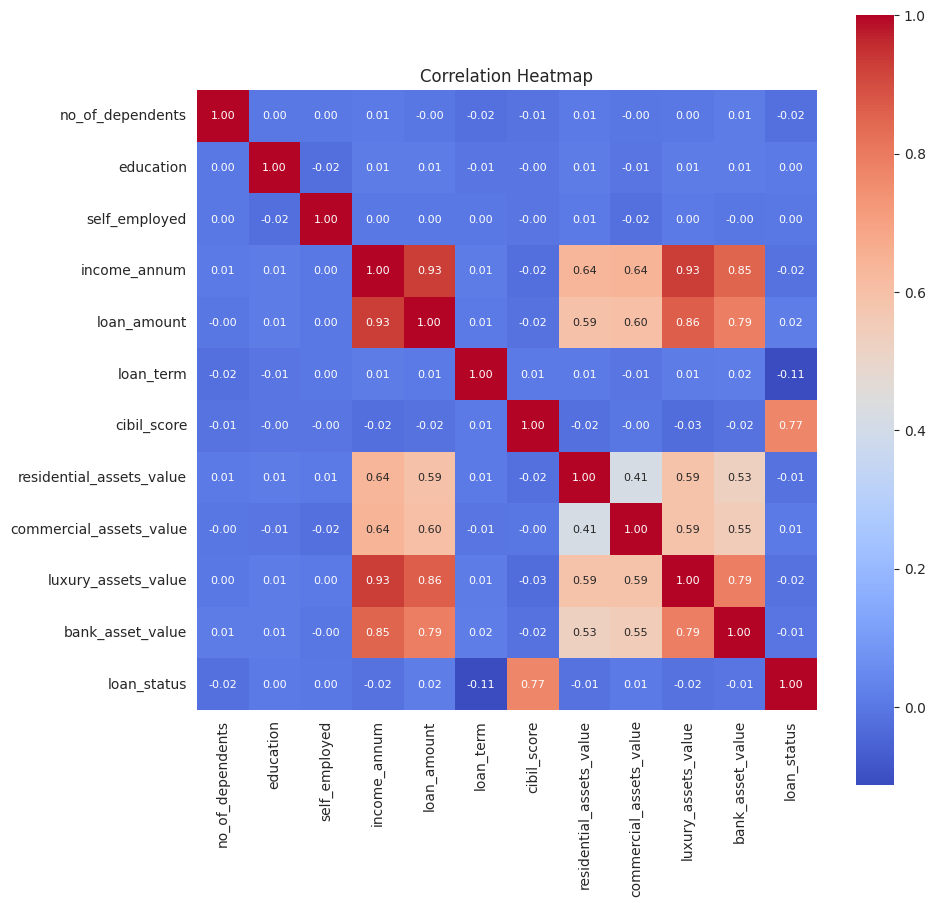

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws = {'size':8},
            cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [19]:
df.drop(columns='luxury_assets_value', axis=1, inplace=True)
df.drop(columns='bank_asset_value', axis=1, inplace=True)

In [20]:
df.dtypes

,0
no_of_dependents,int64
education,int64
self_employed,int64
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
loan_status,int64


In [21]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']

print(df[['loan_amount', 'income_annum', 'loan_to_income_ratio']].head())

   loan_amount  income_annum  loan_to_income_ratio
0     29900000       9600000              3.114583
1     12200000       4100000              2.975610
2     29700000       9100000              3.263736
3     30700000       8200000              3.743902
4     24200000       9800000              2.469388


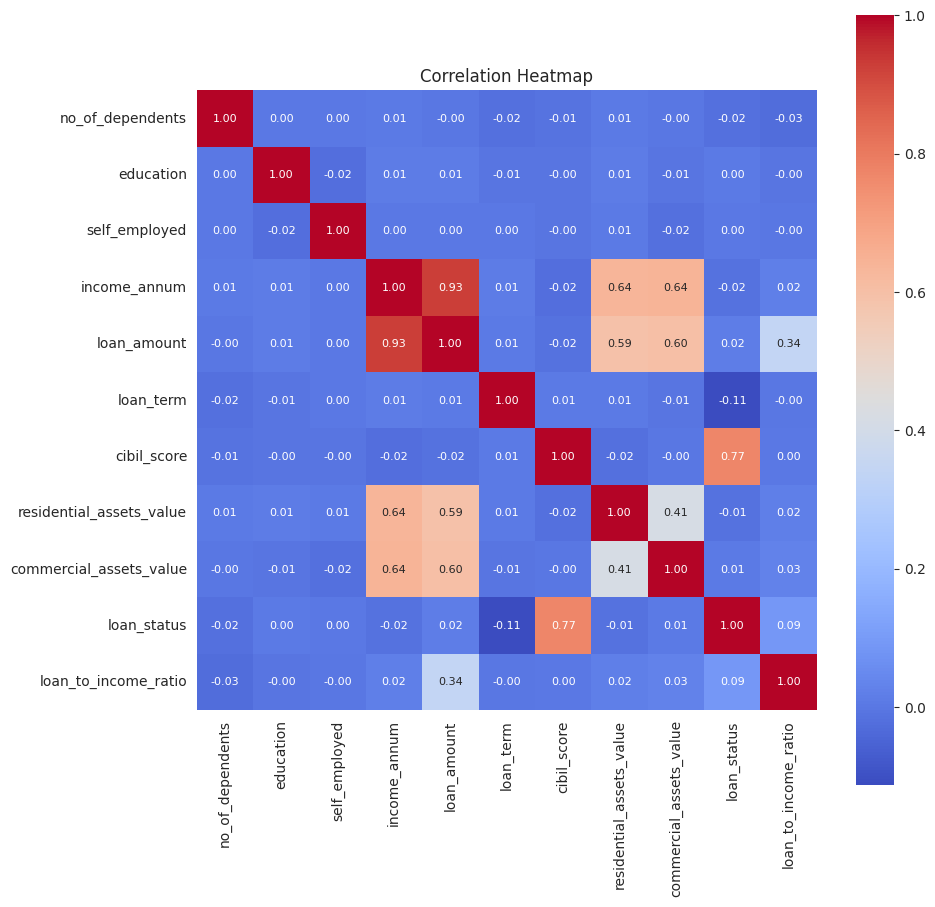

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws = {'size':8},
            cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [23]:
X1 = df.drop(columns=['loan_to_income_ratio', 'loan_status'], axis=1)
X2 = df.drop(columns=['loan_amount', 'income_annum','loan_status'], axis=1)
Y = df['loan_status']

In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, stratify = Y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y, stratify = Y, test_size=0.2, random_state=42)

In [35]:
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

In [36]:
scaler_1.fit(x1_train)
scaler_2.fit(x2_train)

StandardScaler()

In [38]:
x1_train_std = scaler_1.transform(x1_train)
x2_train_std =scaler_2.transform(x2_train)

In [25]:
model_1 = LogisticRegression()
model_2 = LogisticRegression()

In [39]:
model_1.fit(x1_train_std, y1_train)
model_2.fit(x2_train_std, y2_train)

LogisticRegression()

In [40]:
x1_train_prediction = model_1.predict(x1_train_std)
x1_training_data_accuracy = accuracy_score(x1_train_prediction, y1_train)

In [41]:
x2_train_prediction = model_2.predict(x2_train_std)
x2_training_data_accuracy = accuracy_score(x2_train_prediction, y2_train)

In [42]:
print(f'Accuracy of MODEL 1 on Training data : {x1_training_data_accuracy*100}%')
print(f'Accuracy on MODEL 2 Training data : {x2_training_data_accuracy*100}%')

Accuracy of MODEL 1 on Training data : 91.59590043923865%
Accuracy on MODEL 2 Training data : 91.27379209370424%


In [43]:
x1_test_std = scaler_1.transform(x1_test)
x2_test_std = scaler_2.transform(x2_test)

In [44]:
x1_test_prediction = model_1.predict(x1_test_std)
x1_test_data_accuracy = accuracy_score(x1_test_prediction, y1_test)

In [45]:
x2_test_prediction = model_2.predict(x2_test_std)
x2_test_data_accuracy = accuracy_score(x2_test_prediction, y2_test)

In [46]:
print(f'Accuracy on MODEL 1 Test data : {x1_test_data_accuracy*100}%')
print(f'Accuracy on MODEL 2 Test data : {x2_test_data_accuracy*100}%')

Accuracy on MODEL 1 Test data : 91.4519906323185%
Accuracy on MODEL 2 Test data : 91.33489461358315%


In [47]:
import joblib

In [48]:
joblib.dump(scaler_1, 'scaler_1.pkl')
joblib.dump(model_1, 'model_1.pkl')

['model_1.pkl']

In [57]:
input_data = (6, 0, 1, 9800000, 24200000, 20, 382, 12400000, 8200000)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [58]:
input_data_std = scaler_1.transform(input_data_reshaped)
prediction = model_1.predict(input_data_std)
print(prediction)

if (prediction[0]==0):
  print('The loan is Rejected')
else:
  print('The loan is Approved')


[0]
The loan is Rejected
